In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



In [2]:
# Reading the csv file into a pandas DataFrame

df = pd.read_csv("datadownloadrevised.csv", encoding = 'utf8')
df.head()



,PCT_OBESE_ADULTS08,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,...,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PERPOV10,CHILDPOVRATE15,PERCHLDPOV10,METRO13,POPLOSS10
0,32.0,18428.0,17497.0,5.0,34.0,32.0,5344.0,6544.0,22.0,10.0,...,0.0,12.0,27.0,56580,13.0,0,19.0,0,1,0
1,26.0,35211.0,30561.0,13.0,19.0,17.0,9952.0,9887.0,1.0,5.0,...,0.0,17.0,23.0,52387,13.0,0,20.0,0,1,0
2,38.0,5722.0,6070.0,6.0,21.0,22.0,3136.0,2949.0,6.0,11.0,...,0.0,14.0,22.0,31433,32.0,1,45.0,1,0,0
3,32.0,1045.0,969.0,7.0,5.0,4.0,491.0,596.0,21.0,2.0,...,0.0,13.0,23.0,40767,22.0,0,29.0,1,1,0
4,32.0,1548.0,3724.0,141.0,3.0,6.0,609.0,1651.0,171.0,1.0,...,0.0,15.0,25.0,50487,15.0,0,22.0,0,1,0


In [3]:
#  Checking the number of rows and columns in our dataset

df.shape



(3143, 180)

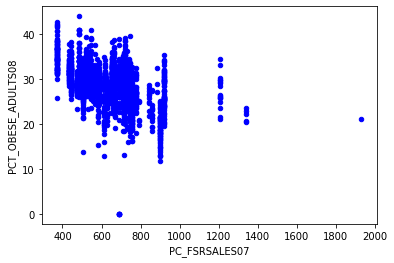

In [4]:
# 1. Plotting data points to eyeball our dataset and see if we can manually find any relationship between the data

# RESULT: LINEAR RELATIONSHIP EXISTS

df.plot(kind='scatter',x='PC_FSRSALES07', y='PCT_OBESE_ADULTS08',color='blue')
plt.show()



In [5]:
# Creating the matrix

X = df['PC_FSRSALES07'].values.reshape(-1,1)
y = df['PCT_OBESE_ADULTS08'].values.reshape(-1,1)

X
y



array([[32. ],
       [26. ],
       [38. ],
       ...,
       [30.3],
       [24. ],
       [28.6]])

In [6]:
from sklearn.preprocessing import scale

df1 = scale(df)



In [7]:
# Split 80% of the data to the training set while 20% of the data to test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Training the algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Calculate the mean_squared_error, the r-squared value for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = regressor.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"The Intercept: {regressor.intercept_}")
print(f"The Coefficient: {regressor.coef_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



The Intercept: [37.56001431]
The Coefficient: [[-0.01391701]]
Mean Squared Error (MSE): 14.266526169682885
R-squared (R2 ): 0.219769848913013


In [10]:
# Make predictions on the test data

y_pred = regressor.predict(X_test)



In [11]:
# Comparing the actual output values for X_test with the predicted values

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.head(5)



,Actual,Predicted
0,35.4,31.507160
1,28.4,27.633437
2,32.8,30.122994
3,31.9,28.303656
4,23.4,27.633437


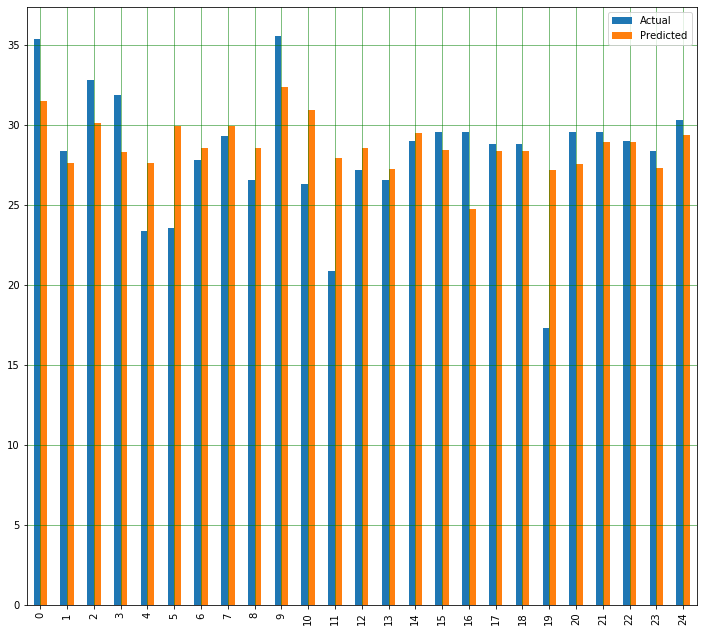

In [12]:
# Plotting first 25 records.

df2 = df1.head(25)
df2.plot(kind='bar',figsize=(12,11))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



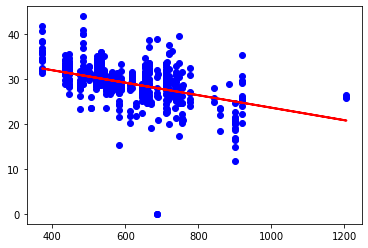

In [13]:
# Plotting the scatter plot to view the data

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()




In [14]:
# Evaluating performance of the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 2.4118573598302873
Mean Squared Error: 14.266526169682885
Root Mean Squared Error: 3.777105528004597
